In [1]:
import sys
import os

current_path = notebook_dir = os.getcwd()
working_dir = os.path.abspath(os.path.join(current_path, '..','..','..'))
if working_dir not in sys.path:
    sys.path.insert(0, working_dir)

from jupyter_ipynb.Entropy_and_information.generate_variables import test_granger_with_generated_data,generate_linear_causal_series,generate_bidirectional_causality,generate_common_cause,generate_nonlinear_causality,generate_seasonal_causality


>>>> Load best CONFIG
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Invalid dates within this fold: 776

Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  776
T_subway_out:  torch.Size([7392, 40])
vision_input_type POIs
vision_model_name None
subway_ds.U_valid torch.Size([940, 40, 7])
NetMob_ds.U_valid torch.Size([940, 40, 7])
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 2821 940 940

 ===== ERROR WITH prefetch_factor====  
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
Invalid dates within this fold: 481
Considered Spatial-Unit:  Index(['AMP', 'BEL', 'BRO', 'COR', 'CUI', 'CUS', 'FLA', 'GOR', 'BLA', 'GRA',
       'GUI', 'GIL', 'HEN', 'HOT', 'LAE', 'MAS', 'MER', 'LUM', 'PRY', 'PER',
       'SAN', 'SAX', 'VMY', 'JEA', 'BON', 'CHA', 'VAI', 'VEN', 'MAC', 'GAR',
       'FOC', 'REP', 'GER', 'DEB', 'JA

<Axes: >

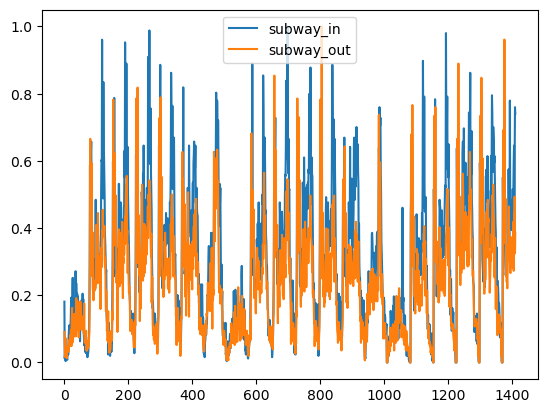

In [3]:
from jupyter_ipynb.Entropy_and_information.granger import GrangerCausalityAnalysis    
from examples.train_model_on_k_fold_validation import load_configuration
from examples.train_and_visu_non_recurrent import get_multi_ds
from utils.utilities import load_inputs_from_dataloader
from constants.config import get_args
import numpy as np 
import pandas as pd
import torch 
if torch.cuda.is_available():
    trial_id = 'subway_in_subway_out_STGCN_MSELoss_2025_02_19_00_05_19271'
    args,_ = load_configuration(trial_id,load_config=True)
else:
    model_name = 'STGCN' #'CNN' # 'STGCN' # 'RNN' # 'LSTM' # 'GRU' # 'MTGNN' # 'DCRNN'
    dataset_names = ["subway_in",'subway_out'] # ["subway_in","calendar"] # ["subway_in"] # ['data_bidon']
    dataset_for_coverage = ['subway_in','netmob'] # ["subway_in"] , ["netmob"], # ['subway_in','netmob']
    args = get_args(model_name,dataset_names,dataset_for_coverage)
    
args,ds_validation = get_multi_ds(args.model_name,
                                args.dataset_names,
                                args.dataset_for_coverage,
                                modification = {'shuffle':False,'data_augmentation':False, 'minmaxnorm':True},
                                args_init = args, 
                                fold_to_evaluate = np.arange(args.K_fold -1))
X,Y,X_c,nb_contextual = load_inputs_from_dataloader(ds_validation[0].dataloader['train'],args.device)

station_i = 0
df = pd.DataFrame({'subway_in':X[:,station_i,-1].cpu(),
                     'subway_out':X_c[-1][:,station_i,-1].cpu()})
df.plot()

In [5]:

gc = GrangerCausalityAnalysis(df)
criterion = 'AIC'
max_lag =  96 # 10h 
results = gc.full_analysis(max_lag=max_lag,criterion=criterion)

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'subway_in': Stationary (p-value: 0.0000, ADF: -6.7907)
Series 'subway_out': Stationary (p-value: 0.0000, ADF: -8.3779)

STEP 2: Making time series stationary
------------------------------------
All series are already stationary. No differencing applied.

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 78
  BIC: 6
  FPE: 78
  HQIC: 74
Selected lag (AIC): 78

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 78):
----------------------------------------
Number of observations: 1334
Log likelihood: 3496.0247
AIC: -10.4464
BIC: -9.2234

STEP 5: Testing Granger causality
-------------------------------
Found 2 promising variable combinations:
  subway_out → subway_in
  subway_in → subway_out

Granger causality test results:
--------

Expected Granger causality:
X -> Y at lags [2, 4]

No Granger causality:
Y -> X


<Figure size 1200x600 with 0 Axes>

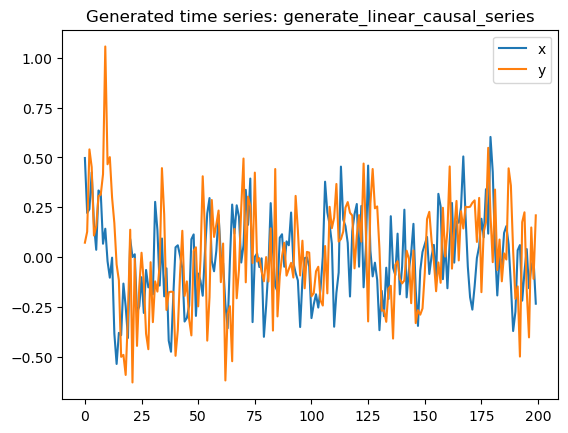

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'x': Stationary (p-value: 0.0000, ADF: -8.8195)
Series 'y': Stationary (p-value: 0.0000, ADF: -6.1793)

STEP 2: Making time series stationary
------------------------------------
All series are already stationary. No differencing applied.

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 4
  BIC: 2
  FPE: 4
  HQIC: 2
Selected lag (BIC): 2

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 2):
----------------------------------------
Number of observations: 198
Log likelihood: 91.7289
AIC: -6.5013
BIC: -6.3352

STEP 5: Testing Granger causality
-------------------------------
Found 2 promising variable combinations:
  y → x
  x → y

Granger causality test results:
-----------------------------
y does NOT Granger cause x (min p-valu

In [2]:
# 1. Linear causal relationship: X -> Y at lags 2 and 4
params = {'n': 200, 'lags': [2, 4], 'coeffs': [0.6, 0.3], 'noise_level': 0.2, 'seed': 42, 'criterion': 'BIC'}
df1, results1 = test_granger_with_generated_data(generate_linear_causal_series, params)

Expected Granger causality:
X -> Y at lags [2]
 Y -> X at lags [3]
Stronger causality: X -> Y


<Figure size 1200x600 with 0 Axes>

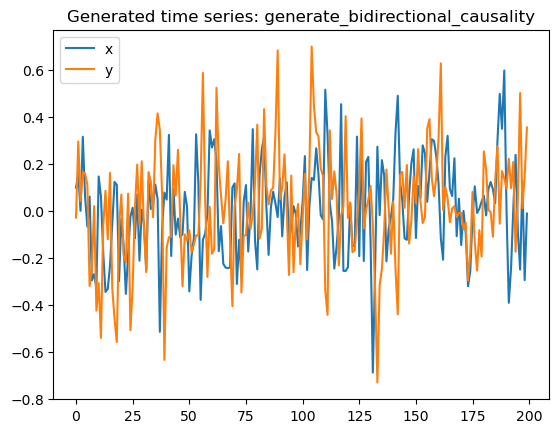

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'x': Stationary (p-value: 0.0000, ADF: -10.3497)
Series 'y': Stationary (p-value: 0.0000, ADF: -5.0527)

STEP 2: Making time series stationary
------------------------------------
All series are already stationary. No differencing applied.

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 3
  BIC: 2
  FPE: 3
  HQIC: 3
Selected lag (AIC): 3

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 3):
----------------------------------------
Number of observations: 197
Log likelihood: 94.7094
AIC: -6.4951
BIC: -6.2618

STEP 5: Testing Granger causality
-------------------------------
Found 2 promising variable combinations:
  y → x
  x → y

Granger causality test results:
-----------------------------
y Granger causes x (min p-value: 0.00

In [7]:
# 2. Bidirectional causality: X <-> Y with different strengths
params = {'n': 200, 
    'xy_lags': [2], 'xy_coeffs': [0.5],  # X -> Y stronger
    'yx_lags': [3], 'yx_coeffs': [0.2],  # Y -> X weaker
    'seed': 42,'criterion': 'AIC'}
df2, results2 = test_granger_with_generated_data(generate_bidirectional_causality, params)

Expected Granger causality:
Z -> X at lags [2]
Z -> Y at lags [3]

No direct Granger causality:
X and Y
However, false positive X -> Y or Y -> X may appear due to common cause


<Figure size 1200x600 with 0 Axes>

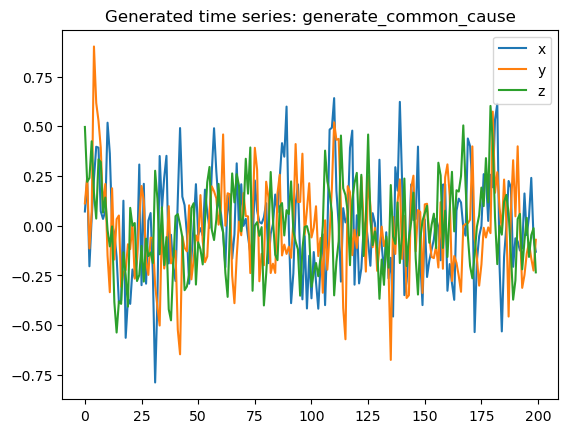

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'x': Stationary (p-value: 0.0000, ADF: -9.4137)
Series 'y': Stationary (p-value: 0.0000, ADF: -6.7918)
Series 'z': Stationary (p-value: 0.0000, ADF: -8.8195)

STEP 2: Making time series stationary
------------------------------------
All series are already stationary. No differencing applied.

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 3
  BIC: 2
  FPE: 3
  HQIC: 3
Selected lag (HQIC): 3

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 3):
----------------------------------------
Number of observations: 197
Log likelihood: 142.6352
AIC: -9.6571
BIC: -9.1572

STEP 5: Testing Granger causality
-------------------------------
Found 3 promising variable combinations:
  y → x
  z → y
  x → z

Granger causality test results:
---

In [11]:
# 3. Common cause: Z -> X, Z -> Y
params = {'n': 200, 'xz_lags': [2], 'xz_coeffs': [0.5],'yz_lags': [3], 'yz_coeffs': [0.5], 'seed': 42,'criterion': 'HQIC'}
df3, results3 = test_granger_with_generated_data(generate_common_cause, params)

Expected non-linear Granger causality:
X -> Y at lag 2

Standard linear Granger test might not fully capture this relationship


<Figure size 1200x600 with 0 Axes>

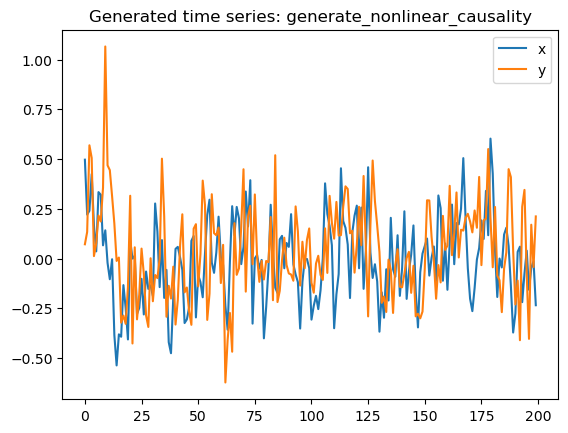

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'x': Stationary (p-value: 0.0000, ADF: -8.8195)
Series 'y': Stationary (p-value: 0.0000, ADF: -9.5037)

STEP 2: Making time series stationary
------------------------------------
All series are already stationary. No differencing applied.

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 2
  BIC: 2
  FPE: 2
  HQIC: 2
Selected lag (BIC): 2

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 2):
----------------------------------------
Number of observations: 198
Log likelihood: 94.4843
AIC: -6.5291
BIC: -6.3631

STEP 5: Testing Granger causality
-------------------------------
Found 2 promising variable combinations:
  y → x
  x → y

Granger causality test results:
-----------------------------
y does NOT Granger cause x (min p-valu

In [13]:
# 4. Non-linear causality
params = {'n': 200, 'lag': 2, 'noise_level': 0.2, 'seed': 42,'criterion': 'BIC'}
df4, results4 = test_granger_with_generated_data(generate_nonlinear_causality, params)

Expected Granger causality:
X -> Y at lag 6

Both X and Y have seasonality - needs differencing to be stationary


<Figure size 1200x600 with 0 Axes>

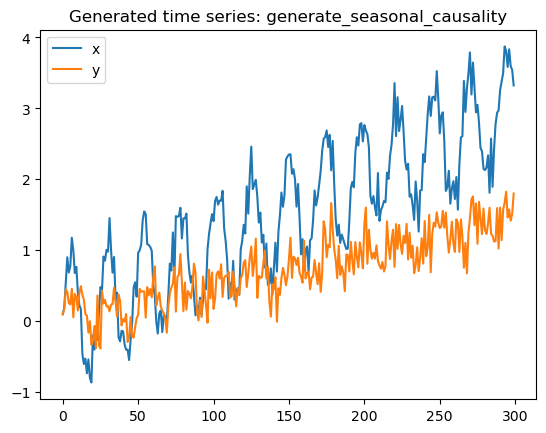

====== GRANGER CAUSALITY ANALYSIS ======

STEP 1: Checking stationarity of time series
-------------------------------------------
Series 'x': Non-stationary (p-value: 0.9101, ADF: -0.4001)
Series 'y': Non-stationary (p-value: 0.8815, ADF: -0.5518)

STEP 2: Making time series stationary
------------------------------------
Differencing applied:
  x: 1 difference(s)
  y: 1 difference(s)
Final data shape: (299, 2)

STEP 3: Selecting optimal lag order
---------------------------------
Optimal lag selection by information criteria:
  AIC: 10
  BIC: 10
  FPE: 10
  HQIC: 10
Selected lag (AIC): 10

STEP 4: Performing VAR analysis
-----------------------------

VAR Analysis Summary (lag order = 10):
----------------------------------------
Number of observations: 289
Log likelihood: 42.2161
AIC: -5.6772
BIC: -5.1444

STEP 5: Testing Granger causality
-------------------------------
Found 2 promising variable combinations:
  y → x
  x → y

Granger causality test results:
-----------------------

In [14]:
# 5. Seasonal causality
params = {'n': 300, 'period': 24, 'lag': 6, 'seasonal_strength': 0.8, 'causal_strength': 0.5, 'seed': 42,'criterion': 'AIC'}
df5, results5 = test_granger_with_generated_data(generate_seasonal_causality, params)